# Convolutional Neural Network (CNN)

In this laboratory we continue to work with Keras. We will focus on Convolutional Neural Network
we are going to work with cifar10, a  dataset consisting of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Therefore the main goal of this laboratory is to solve a multiclass classification problem with 10 different classes

<br><img src= "https://drive.google.com/uc?export=view&id=1u-htQUPUm40h4HBBvg-JA5r0IfrRHqrq" width="500px" align="middle"><br>)




In this laboratory we work again on the cifar10 dataset.

In [1]:
# import some libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

### Loading the dataset

In [2]:
# load the dataset
num_classes = 10
new_im_size = 32
channels = 3
cifar10 = tf.keras.datasets.cifar10
(x_learn, y_learn),(x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 7s 0us/step


## Dataset pre-processing
As pre-processing steps we apply

* Normalization in [0 1], to speed up learning and have faster convergence
* Splitting in training and validation (needed for an appropriate learning pipeline) and label preprocessing (one-hot encoding)
* Standardization, to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.

In [3]:
# Normalize the data in [0 1]
print("Normalizing training set..")
x_learn = np.asarray(x_learn, dtype=np.float32) / 255 # Normalizing training set
print("Normalizing test set..")
x_test = np.asarray(x_test, dtype=np.float32) / 255 # Normalizing test set

Normalizing training set..
Normalizing test set..


In [4]:
# split in training and validation
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.25, random_state=12)

## 2.1.3 Standardization
Another common practice in data pre-processing is standardization.<br>
The idea about standardization is to compute your dataset mean and standard deviation in order to subtract from every data point $x$ the dataset mean $\mu$ and then divide by the standard deviation $\sigma$.<br>
That is to apply the following operation:<br>
<img src="https://drive.google.com/uc?id=1rpuybw_fmI8XK38JQhWWxX2TOExBAV2V" width="150px"><br>
The outcome of this operation is to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.<br>
By applying normalization to our data we are making the features more similar to each other and this usually makes the learning process easier.<br>
To better understand that we can show an example of what happens after a standardization process is applied to a dataset:
<img src="https://drive.google.com/uc?id=1wtqTW4hz8n8k7b7q0mUSzCc9X0npNUY2" width="500px" align="left"><br>

In [6]:
# Standardizing the data
def standardize_dataset(X):
    image_means = []
    image_stds = []

    for image in X:
        image_means.append(np.mean(image)) # Computing the image mean
        image_stds.append(np.std(image)) # Computing the image standard deviation

    dataset_mean = np.mean(image_means) # Computing the dataset mean
    dataset_std = np.mean(image_stds) # Computing the dataset standard deviation
    return [dataset_mean, dataset_std] # For every image we subtract to it the dataset mean and we divide by the dataset standard deviation

dataset_mean, dataset_std = standardize_dataset(x_train)

print("Standardizing training set..")
x_train = (x_train-dataset_mean)/dataset_std # Standardizing the training set
print("Standardizing validation set..")
x_val = (x_val-dataset_mean)/dataset_std # Standardizing the test set
print("Standardizing test set..")
x_test = (x_test-dataset_mean)/dataset_std # Standardizing the test set

# one hot encode target values
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_val_enc = tf.keras.utils.to_categorical(y_val)
y_test_enc = tf.keras.utils.to_categorical(y_test)

print("Size of the training set")
print("x_train", x_train.shape)
print("y_train", y_train.shape)

print("Size of the validation set")
print("x_val", x_val.shape)
print("y_val", y_val.shape)

print("Size of the test set")
print("x_test", x_test.shape)
print("y_test", y_test.shape)

Standardizing training set..
Standardizing validation set..
Standardizing test set..
Size of the training set
x_train (37500, 32, 32, 3)
y_train (37500, 1)
Size of the validation set
x_val (12500, 32, 32, 3)
y_val (12500, 1)
Size of the test set
x_test (10000, 32, 32, 3)
y_test (10000, 1)


# 2.2 Training a model from scratch
Now that we have properly pre-processed our data, we are going to create a convolutional model in Keras.
Usually a convolutional model is made by two subsequent part:
* A convolutional part
* A fully connected

We can show an example of the general structure in the next picture:
<img src="https://drive.google.com/uc?id=1duP8u9bs6ELNu4degUuYP4-YS1mBYn2O" width="600px"><br>

Usually the convolutional part is made by some layers composed by
* convolutional layer: performs a spatial convolution over images
* pooling layer: used to reduce the output spatial dimension from $n$ to 1 by averaging the $n$ different value or considering the maximum between them
* dropout layer: applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.

The convolutional part produces its output and the fully connected part ties together the received information in order to solve the classification problem.
Let us start with a shallow architecture with only 2 conv

In [13]:
# Creating the model from scratch
import tensorflow.keras
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score


scratch_model = Sequential()

# Build here your keras model.
# Try to use one convolutional layer, joint with pooling layer and dropout layer

# Creating conv 1: conv with 1024 kernels of size 3x3, padding='same', input_shape=(new_im_size, new_im_size, channels)
# + LeakyReLU(alpha=0.1) + maxpooling with region size 2x2 and padding='same'+Dropout(0.25)
scratch_model.add(Conv2D(1024, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))

# scratch_model.add(Conv2D(254, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
# scratch_model.add(LeakyReLU(alpha=0.1))
# scratch_model.add(MaxPooling2D((2, 2),padding='same'))
# scratch_model.add(Dropout(0.25))


# Adding the dense final part: Flatten + Dense with 64 neurons and relu + Dropout 25% + Dense with 10 neurons and softmax
#...
scratch_model.add(Flatten())
scratch_model.add(Dense(64, activation='relu'))
scratch_model.add(Dropout(0.25))
scratch_model.add(Dense(10, activation='softmax'))
# Compile the model with the Adam optimizer
scratch_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 1024)      28672     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 1024)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 1024)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 1024)      0         
                                                                 
 flatten_3 (Flatten)         (None, 262144)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                16777280  
                                                      

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F070ca1bd-fb35-4ed1-9d49-0e7979535288_675x370.jpeg" width="600px"><br>

In [ ]:
# Try to make the netwok deeper, adding more Conv and Pooling layers. Do the performances improve?
# ...
# ...
# ...

In [14]:
# Let's train the model!

# Network parameters
batch_size = 64 # Setting the batch size
epochs = 5
# On GPU this is fast process
scratch_model_history = scratch_model.fit(x_train, y_train_enc, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(x_val, y_val_enc))

Epoch 1/5
586/586 [==============================] - 29s 48ms/step - loss: 2.3433 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0968
Epoch 2/5
586/586 [==============================] - 27s 46ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0968
Epoch 3/5
586/586 [==============================] - 27s 46ms/step - loss: 2.3031 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.0968
Epoch 4/5
586/586 [==============================] - 27s 46ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.0968
Epoch 5/5
586/586 [==============================] - 27s 46ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3029 - val_accuracy: 0.0966


In [15]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

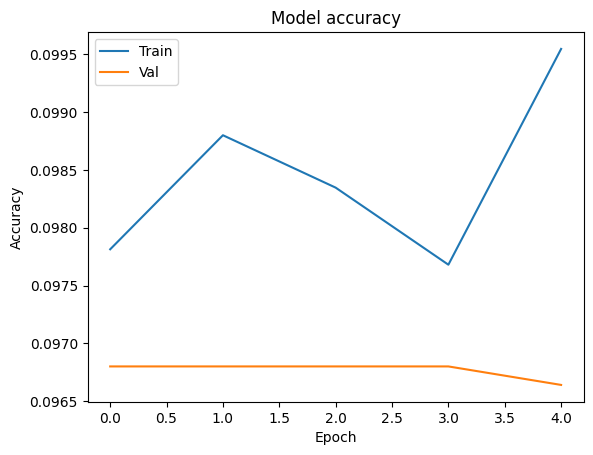

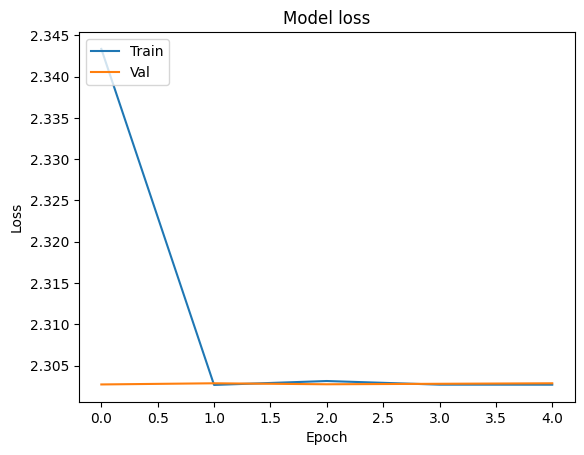

1172/1172 [==============================] - 7s 6ms/step
Training accuracy:  0.10112
391/391 [==============================] - 2s 6ms/step
Validation accuracy:  0.09664
313/313 [==============================] - 2s 6ms/step
Test accuracy:  0.1


In [16]:
# Getting the results

plot_history(scratch_model_history)

print("Training accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_train), axis=-1), y_train))
print("Validation accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_val), axis=-1), y_val))
print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_test), axis=-1), y_test))


###  Try to make the netwok deeper, adding more Conv and Pooling layers. Do the performances improve?

In [12]:
# Creating the model from scratch
import tensorflow.keras
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score


scratch_model = Sequential()

# Build here your keras model.
# Try to use one convolutional layer, joint with pooling layer and dropout layer

# Creating conv 1: conv with 1024 kernels of size 3x3, padding='same', input_shape=(new_im_size, new_im_size, channels)
# + LeakyReLU(alpha=0.1) + maxpooling with region size 2x2 and padding='same'+Dropout(0.25)
scratch_model.add(Conv2D(1024, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))

scratch_model.add(Conv2D(254, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))


# Adding the dense final part: Flatten + Dense with 64 neurons and relu + Dropout 25% + Dense with 10 neurons and softmax
#...
scratch_model.add(Flatten())
scratch_model.add(Dense(64, activation='relu'))
scratch_model.add(Dropout(0.25))
scratch_model.add(Dense(10, activation='softmax'))
# Compile the model with the Adam optimizer
scratch_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 1024)      28672     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 1024)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 1024)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 1024)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 254)       2341118   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 254)       0         
                                                      

In [9]:
# Let's train the model!

# Network parameters
batch_size = 64 # Setting the batch size
epochs = 5
# On GPU this is fast process
scratch_model_history = scratch_model.fit(x_train, y_train_enc, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(x_val, y_val_enc))

Epoch 1/5
586/586 [==============================] - 50s 72ms/step - loss: 1.5554 - accuracy: 0.4467 - val_loss: 1.2456 - val_accuracy: 0.5551
Epoch 2/5
586/586 [==============================] - 39s 66ms/step - loss: 1.1963 - accuracy: 0.5785 - val_loss: 1.0475 - val_accuracy: 0.6298
Epoch 3/5
586/586 [==============================] - 41s 70ms/step - loss: 1.0517 - accuracy: 0.6319 - val_loss: 0.9577 - val_accuracy: 0.6674
Epoch 4/5
586/586 [==============================] - 42s 71ms/step - loss: 0.9586 - accuracy: 0.6636 - val_loss: 0.9565 - val_accuracy: 0.6732
Epoch 5/5
586/586 [==============================] - 43s 73ms/step - loss: 0.8813 - accuracy: 0.6872 - val_loss: 0.8838 - val_accuracy: 0.6906


In [10]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

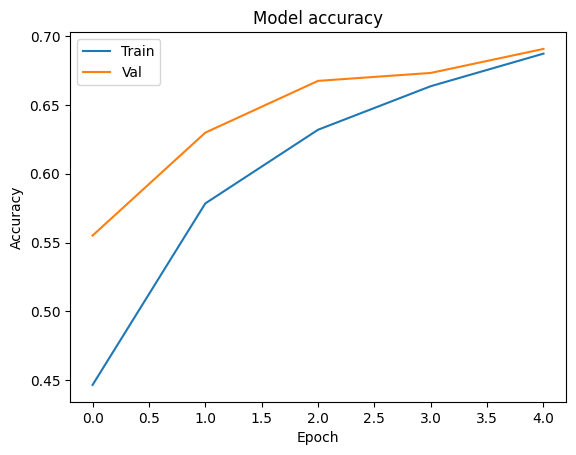

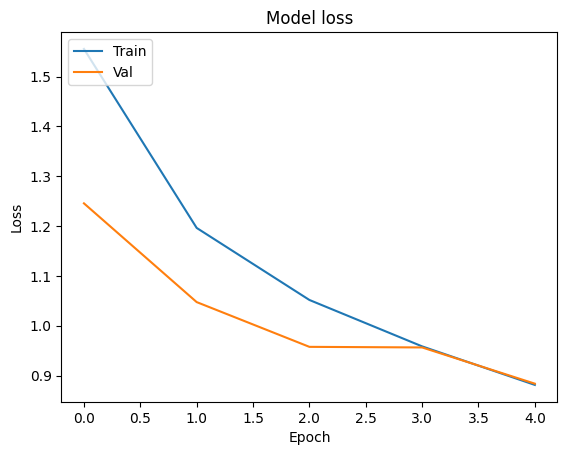

1172/1172 [==============================] - 12s 9ms/step
Training accuracy:  0.7811466666666667
391/391 [==============================] - 4s 9ms/step
Validation accuracy:  0.69064
313/313 [==============================] - 3s 10ms/step
Test accuracy:  0.6968


In [11]:
# Getting the results

plot_history(scratch_model_history)

print("Training accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_train), axis=-1), y_train))
print("Validation accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_val), axis=-1), y_val))
print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_test), axis=-1), y_test))


### 3 CNN

In [22]:
# Creating the model from scratch
import tensorflow.keras
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score


scratch_model = Sequential()

# Build here your keras model.
# Try to use one convolutional layer, joint with pooling layer and dropout layer

# Creating conv 1: conv with 1024 kernels of size 3x3, padding='same', input_shape=(new_im_size, new_im_size, channels)
# + LeakyReLU(alpha=0.1) + maxpooling with region size 2x2 and padding='same'+Dropout(0.25)
scratch_model.add(Conv2D(1024, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))

scratch_model.add(Conv2D(254, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))

scratch_model.add(Conv2D(64, kernel_size=(3, 3), padding='same',input_shape=(new_im_size, new_im_size, channels)))
scratch_model.add(LeakyReLU(alpha=0.1))
scratch_model.add(MaxPooling2D((2, 2),padding='same'))
scratch_model.add(Dropout(0.25))

# Adding the dense final part: Flatten + Dense with 64 neurons and relu + Dropout 25% + Dense with 10 neurons and softmax
#...
scratch_model.add(Flatten())
scratch_model.add(Dense(64, activation='relu'))
scratch_model.add(Dropout(0.25))
scratch_model.add(Dense(10, activation='softmax'))
# Compile the model with the Adam optimizer
scratch_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the model through the summary function
scratch_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 1024)      28672     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 1024)      0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 1024)      0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 1024)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 254)       2341118   
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 254)       0         
                                                      

In [23]:
# Let's train the model!

# Network parameters
batch_size = 64 # Setting the batch size
epochs = 5
# On GPU this is fast process
scratch_model_history = scratch_model.fit(x_train, y_train_enc, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(x_val, y_val_enc))

Epoch 1/5
586/586 [==============================] - 43s 70ms/step - loss: 1.6252 - accuracy: 0.4167 - val_loss: 1.2636 - val_accuracy: 0.5528
Epoch 2/5
586/586 [==============================] - 41s 70ms/step - loss: 1.2534 - accuracy: 0.5537 - val_loss: 1.0721 - val_accuracy: 0.6241
Epoch 3/5
586/586 [==============================] - 40s 67ms/step - loss: 1.0955 - accuracy: 0.6144 - val_loss: 0.9437 - val_accuracy: 0.6660
Epoch 4/5
586/586 [==============================] - 41s 70ms/step - loss: 1.0072 - accuracy: 0.6471 - val_loss: 0.8737 - val_accuracy: 0.6939
Epoch 5/5
586/586 [==============================] - 41s 70ms/step - loss: 0.9298 - accuracy: 0.6739 - val_loss: 0.8278 - val_accuracy: 0.7128


In [24]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

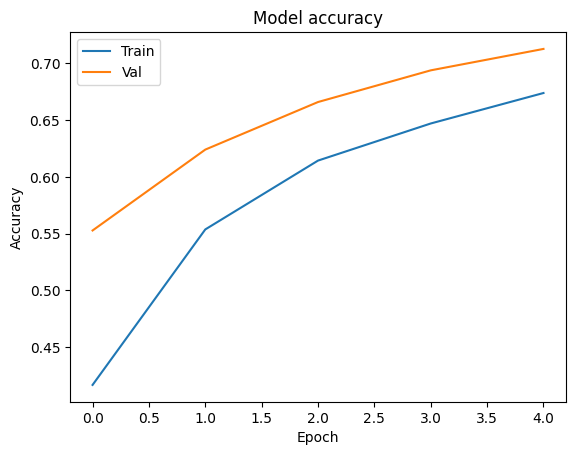

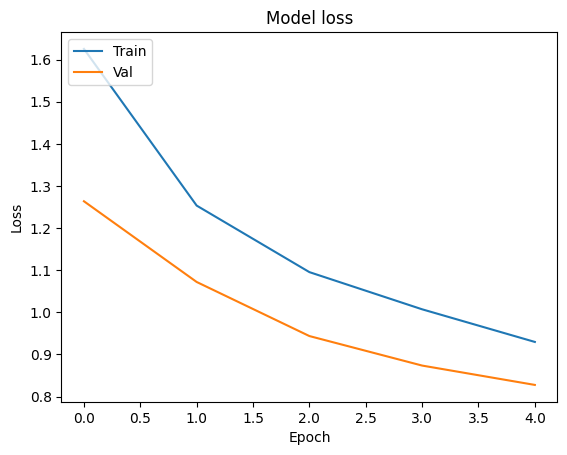

1172/1172 [==============================] - 11s 9ms/step
Training accuracy:  0.7607733333333333
391/391 [==============================] - 4s 9ms/step
Validation accuracy:  0.7128
313/313 [==============================] - 3s 9ms/step
Test accuracy:  0.7119


In [25]:
# Getting the results

plot_history(scratch_model_history)

print("Training accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_train), axis=-1), y_train))
print("Validation accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_val), axis=-1), y_val))
print("Test accuracy: ", accuracy_score(np.argmax(scratch_model.predict(x_test), axis=-1), y_test))


### Add data augmentation, using for instance:


> data_augmentation = tf.keras.Sequential([tensorflow.keras.layers.RandomFlip("horizontal_and_vertical"), tensorflow.keras.layers.RandomRotation(0.2),])


> model.add(data_augmentation)





### Try to make the network deeper, adding more Conv and Pooling layers. Do the performances improve?

# Using a pre-trained model
A common alternative to train a model from scratch consists in using a pre-trained model.<br>
The idea is to replace the convolutional part with a highly optimized convolutional part engineered and trained previously by someone else.<br>
Usually the models that we can use through keras.applications have been trained over the ImageNet dataset. <br>
Today we are going to use the Xception Net model. Its architecture it is shown below:
<img src="https://drive.google.com/uc?id=1eKivBCSKnWKyBxmGe5s64oOyhzhuCaqU" width="600px"><br>
After the convolutional part replacement we still need to set up a fully connected part.<br>


In [17]:
# Creating the model based over the pretrained Xception network
from tensorflow.keras import applications
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()

model.add(tensorflow.keras.layers.UpSampling2D(size=(7,7),input_shape=(32,32,3)))

Xception_model = applications.Xception(weights = "imagenet", include_top=False, input_shape = (224, 224, channels))

for layer in Xception_model.layers:
    layer.trainable = False

Inputs = layers.Input(shape=(32,32,3))
x = model(Inputs)
x = Xception_model(x)
x = layers.Flatten()(x)
# let's add a fully-connected layer
x = layers.Dense(128, activation='relu')(x)
# and a logistic layer for 10 classes
predictions = layers.Dense(10, activation='softmax')(x)

# this is the model we will train
pre_trained_model = tensorflow.keras.Model(Inputs, outputs=predictions)
pre_trained_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

83683744/83683744 [==============================] - 3s 0us/step


In [18]:
# Visualize the model through the summary function
pre_trained_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               12845184  
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 33707954 (128.59 MB)
Trainable params: 12846474

In [19]:
# Let's train the model!
epochs = 5 #it may take a while, the number of epochs should be low...
pretrained_model_history = pre_trained_model.fit(x_train, y_train_enc, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val_enc))

Epoch 1/5
586/586 [==============================] - 264s 434ms/step - loss: 1.1012 - accuracy: 0.7242 - val_loss: 0.7201 - val_accuracy: 0.7695
Epoch 2/5
586/586 [==============================] - 219s 374ms/step - loss: 0.5302 - accuracy: 0.8203 - val_loss: 0.6812 - val_accuracy: 0.7846
Epoch 3/5
586/586 [==============================] - 218s 372ms/step - loss: 0.3855 - accuracy: 0.8656 - val_loss: 0.7359 - val_accuracy: 0.7758
Epoch 4/5
586/586 [==============================] - 219s 373ms/step - loss: 0.2940 - accuracy: 0.8961 - val_loss: 0.7062 - val_accuracy: 0.7974
Epoch 5/5
586/586 [==============================] - 246s 420ms/step - loss: 0.2257 - accuracy: 0.9208 - val_loss: 0.8072 - val_accuracy: 0.7893


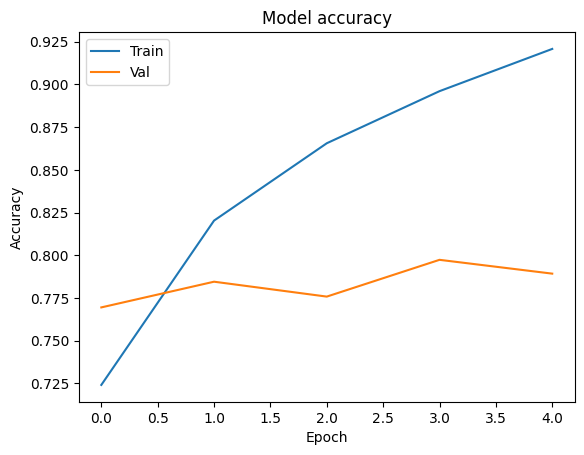

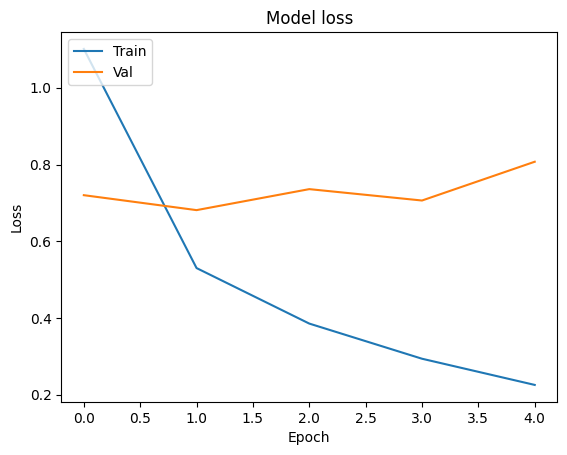

1172/1172 [==============================] - 183s 153ms/step
Training accuracy:  0.9449066666666667
391/391 [==============================] - 59s 150ms/step
Validation accuracy:  0.78928
313/313 [==============================] - 51s 162ms/step
Test accuracy:  0.7863


In [20]:
# Getting the results
plot_history(pretrained_model_history)

print("Training accuracy: ", accuracy_score(np.argmax(pre_trained_model.predict(x_train), axis=-1), y_train))
print("Validation accuracy: ", accuracy_score(np.argmax(pre_trained_model.predict(x_val), axis=-1), y_val))
print("Test accuracy: ", accuracy_score(np.argmax(pre_trained_model.predict(x_test), axis=-1), y_test))

# Comparing the models

Now that we trained both the "from scratch" and the "pre-trained" models, we are going to compare the obtained results obtained during the training. We are going to consider accuracy and loss.<br>
**What can you expect from these plots?**

Producing accuracy over epochs plot
Producing loss over epochs plot


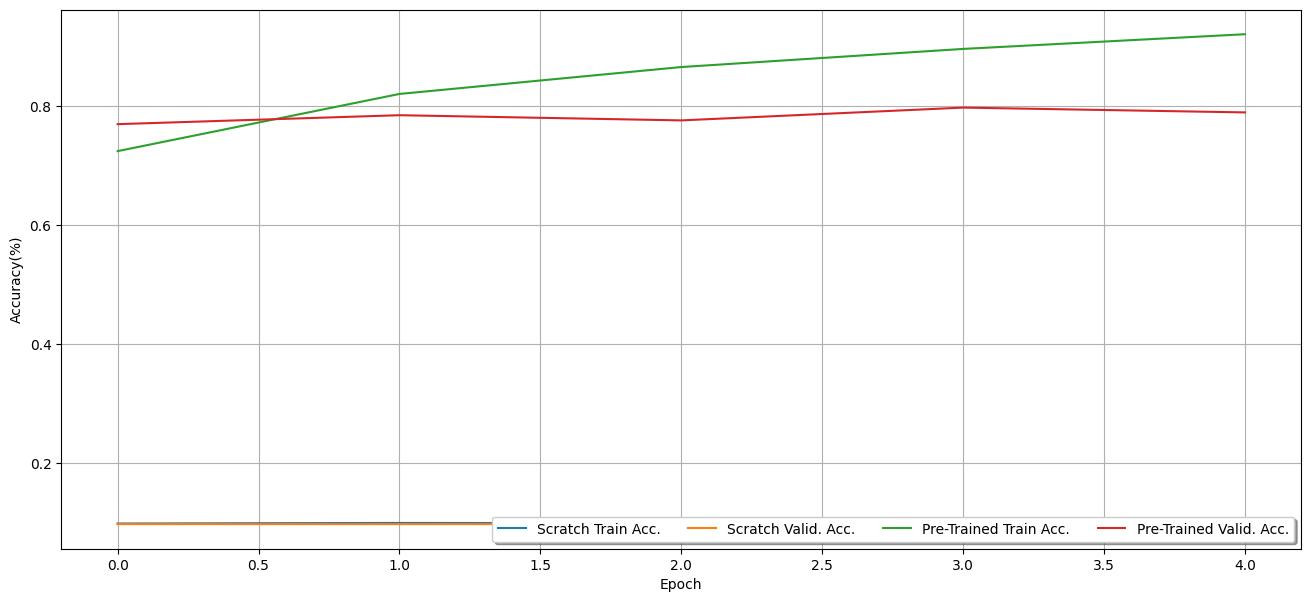

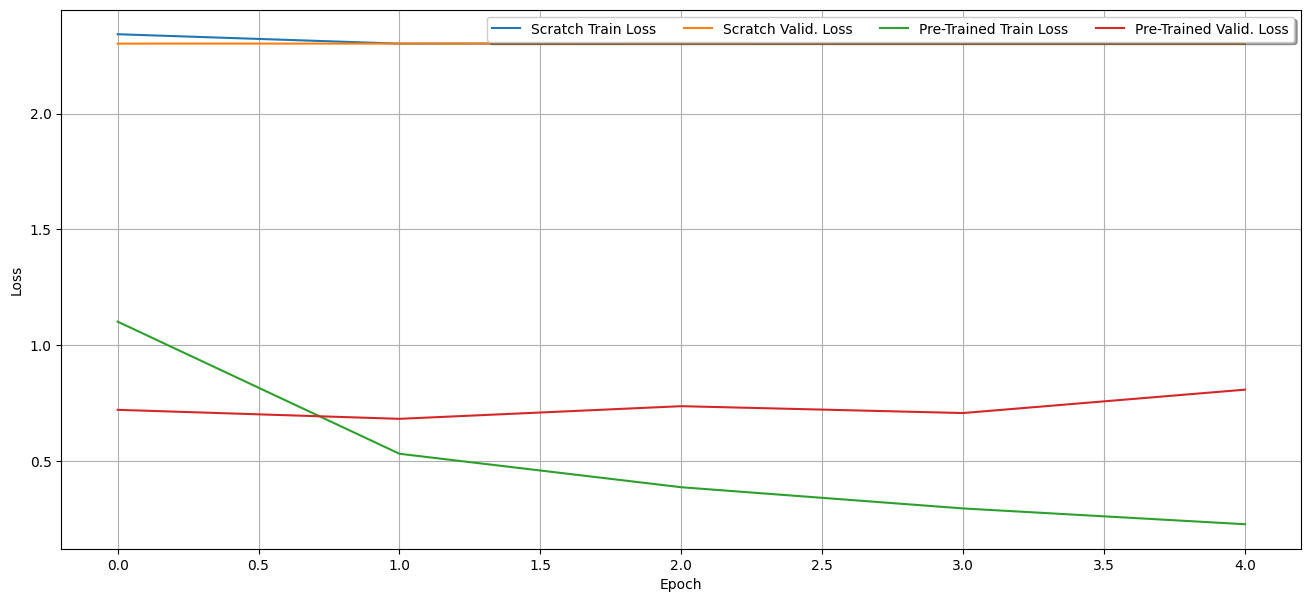

In [21]:
# Create here the plots to compare the "from scratch" model and the "pretrained" model
# Try to produce a comparison plot about the accuracies (train and validation) and another plot for the losses
# Creating the plots to compare the "from scratch" model and the "pretrained" model
# Producing accuracy over epochs plot

scratch_model_train_acc = scratch_model_history.history['accuracy']
scratch_model_valid_acc = scratch_model_history.history['val_accuracy']
scratch_model_train_loss = scratch_model_history.history['loss']
scratch_model_valid_loss = scratch_model_history.history['val_loss']

pretrained_model_train_acc = pretrained_model_history.history['accuracy']
pretrained_model_valid_acc = pretrained_model_history.history['val_accuracy']
pretrained_model_train_loss = pretrained_model_history.history['loss']
pretrained_model_valid_loss = pretrained_model_history.history['val_loss']

print("Producing accuracy over epochs plot")
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_acc, label="Scratch Train Acc.")
plt.plot(scratch_model_valid_acc, label="Scratch Valid. Acc.")

plt.plot(pretrained_model_train_acc, label="Pre-Trained Train Acc.")
plt.plot(pretrained_model_valid_acc, label="Pre-Trained Valid. Acc.")

plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('acc_epochs.png', dpi=300)


# Producing loss over epochs plot
print("Producing loss over epochs plot")
fig = plt.figure(figsize=(16,7))

plt.plot(scratch_model_train_loss, label="Scratch Train Loss")
plt.plot(scratch_model_valid_loss, label="Scratch Valid. Loss")

plt.plot(pretrained_model_train_loss, label="Pre-Trained Train Loss")
plt.plot(pretrained_model_valid_loss, label="Pre-Trained Valid. Loss")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=4)
plt.grid()
plt.savefig('loss_epochs.png', dpi=300)

plt.show()






**What information can you get from these plots?**<br>
**Try to visualize the differences between the deeper model and the pre-trained xception model!
**Are they showing what you expected?**